<a href="https://colab.research.google.com/github/syamkakarla98/Hyperspectral_Image_Analysis_Simplified/blob/master/Articles/Hyperspectral_Image_Analysis%E2%80%8A_%E2%80%8AClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = 'tomato'>Hyperspectral Image Analysis - Classification</font>

## Import Libraries

In [131]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
sns.axes_style('whitegrid');
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sn

## Download HSI Data

In [2]:
!wget http://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat http://www.ehu.eus/ccwintco/uploads/c/c4/Indian_pines_gt.mat

--2020-08-20 09:02:14--  http://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5953527 (5.7M) [text/plain]
Saving to: ‘Indian_pines_corrected.mat.1’

Indian_pines_correc 100%[===================>]   5.68M   713KB/s    in 9.3s    

2020-08-20 09:02:24 (626 KB/s) - ‘Indian_pines_corrected.mat.1’ saved [5953527/5953527]

--2020-08-20 09:02:24--  http://www.ehu.eus/ccwintco/uploads/c/c4/Indian_pines_gt.mat
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1125 (1.1K) [text/plain]
Saving to: ‘Indian_pines_gt.mat.1’

Indian_pines_gt.mat 100%[===================>]   1.10K  --.-KB/s    in 0s      

2020-08-20 09:02:24 (150 MB/s) - ‘Indian_pines_gt.mat.1’ saved [1125/1125]

FINISHED --2020-08-20 09:02:24--
Total 

In [3]:
!ls

Dataset.csv		      Indian_pines_gt.mat.1  IP_PCA_Bands.png
Indian_pines_corrected.mat    IP_40_PCA.csv	     sample_data
Indian_pines_corrected.mat.1  IP_Bands.png
Indian_pines_gt.mat	      IP_GT.png


## Read the Data

In [4]:
from scipy.io import loadmat

def read_HSI():
  X = loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']
  y = loadmat('Indian_pines_gt.mat')['indian_pines_gt']
  print(f"X shape: {X.shape}\ny shape: {y.shape}")
  return X, y

X, y = read_HSI()

X shape: (145, 145, 200)
y shape: (145, 145)


### Visualize Bands

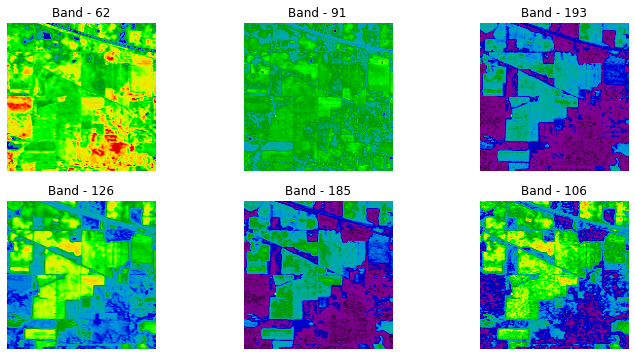

In [5]:
fig = plt.figure(figsize = (12, 6))

for i in range(1, 1+6):
    fig.add_subplot(2,3, i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:,:,q], cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {q}')
plt.savefig('IP_Bands.png')

### Visualize the Ground Truth

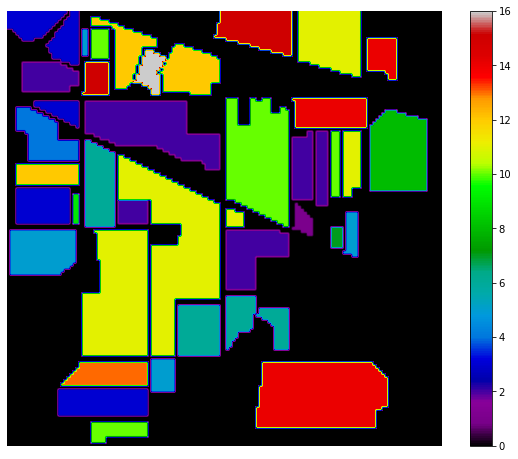

In [6]:
plt.figure(figsize=(10, 8))
plt.imshow(y, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('IP_GT.png')
plt.show()

## Convert the dataset into csv 

In [7]:
import pandas as pd
import numpy as np

def extract_pixels(X, y):
  q = X.reshape(-1, X.shape[2])
  df = pd.DataFrame(data = q)
  df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
  df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
  df.to_csv('Dataset.csv')
  return df
  
df = extract_pixels(X, y)


In [8]:
df.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,band11,band12,band13,band14,band15,band16,band17,band18,band19,band20,band21,band22,band23,band24,band25,band26,band27,band28,band29,band30,band31,band32,band33,band34,band35,band36,band37,band38,band39,band40,...,band162,band163,band164,band165,band166,band167,band168,band169,band170,band171,band172,band173,band174,band175,band176,band177,band178,band179,band180,band181,band182,band183,band184,band185,band186,band187,band188,band189,band190,band191,band192,band193,band194,band195,band196,band197,band198,band199,band200,class
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,4816,4769,4610,4805,4828,4861,4767,4624,4549,4463,4462,4446,4445,4336,4381,4319,4207,4305,4311,3991,4168,3942,4061,4362,4318,4252,4869,5284,5055,3591,...,1396,1381,1396,1381,1353,1346,1341,1332,1324,1310,1318,1330,1310,1292,1280,1275,1266,1264,1233,1241,1232,1215,1215,1187,1168,1171,1150,1134,1123,1135,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,5141,5100,4994,5172,5290,5289,5217,5053,5033,4939,4931,4941,4902,4824,4859,4805,4698,4794,4806,4452,4628,4433,4643,4967,4853,4760,5449,5768,5684,3987,...,1421,1415,1428,1415,1379,1370,1360,1353,1352,1336,1346,1351,1330,1315,1305,1292,1282,1286,1259,1259,1250,1229,1232,1195,1177,1184,1153,1137,1138,1137,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,5227,5172,5097,5313,5411,5412,5341,5191,5140,5069,5110,5119,5046,4981,5023,4987,4862,4965,4992,4595,4756,4529,4801,5077,4983,4868,5515,5972,5913,4027,...,1446,1440,1443,1425,1390,1379,1376,1363,1355,1347,1361,1356,1341,1330,1321,1304,1290,1289,1263,1269,1261,1245,1241,1214,1185,1188,1156,1147,1149,1144,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,5147,5078,5040,5237,5321,5344,5255,5121,5035,4956,4994,4980,4905,4857,4900,4831,4720,4848,4847,4484,4613,4402,4674,4966,4848,4776,5473,5894,5789,4086,...,1432,1427,1426,1416,1386,1374,1375,1359,1343,1343,1354,1351,1333,1329,1313,1296,1280,1281,1251,1255,1253,1238,1223,1207,1188,1188,1154,1143,1144,1146,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,4853,4857,4734,4879,4976,4958,4885,4754,4647,4532,4586,4591,4492,4453,4497,4398,4297,4408,4401,4102,4227,4075,4264,4529,4490,4438,5001,5378,5321,3779,...,1401,1397,1395,1390,1368,1349,1354,1340,1330,1324,1336,1332,1320,1307,1287,1283,1267,1265,1239,1240,1239,1229,1212,1202,1178,1178,1143,1135,1138,1135,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21025 entries, 0 to 21024
Columns: 201 entries, band1 to class
dtypes: uint16(200), uint8(1)
memory usage: 8.0 MB


In [10]:
df.iloc[:, :-1].describe()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,band11,band12,band13,band14,band15,band16,band17,band18,band19,band20,band21,band22,band23,band24,band25,band26,band27,band28,band29,band30,band31,band32,band33,band34,band35,band36,band37,band38,band39,band40,...,band161,band162,band163,band164,band165,band166,band167,band168,band169,band170,band171,band172,band173,band174,band175,band176,band177,band178,band179,band180,band181,band182,band183,band184,band185,band186,band187,band188,band189,band190,band191,band192,band193,band194,band195,band196,band197,band198,band199,band200
count,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,...,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000
mean,2957.363472,4091.321237,4277.502259,4169.956671,4516.678668,4790.595149,4848.317574,4714.732509,4668.904828,4439.065541,4407.192580,4307.541831,4148.396671,4400.474625,4470.958811,4447.711106,4286.070059,4070.359239,3967.324899,3861.227491,3833.674863,3810.350773,3742.210131,3657.676243,3651.536837,3562.264067,3453.274340,3489.048133,3465.970036,3250.786064,3504.638906,3224.430059,3511.536457,3948.562235,4173.646468,4445.024209,5309.742592,5950.961427,5937.520761,4137.620214,...,1254.995719,1253.893698,1253.598954,1254.374792,1249.088989,1234.321950,1228.068966,1226.639191,1223.088181,1217.272818,1211.462497,1222.972699,1221.611510,1211.583353,1199.533841,1184.804328,1174.728704,1166.305161,1161.820975,1149.567562,1148.084661,1143.412224,1132.359049,1131.622354,1112.867729,1103.281665,1105.472010,1088.798526,1080.433864,1080.911772,1079.310773,1061.927848,1060.210273,1063.276813,1050.048514,1040.201141,1043.370321,1030.194816,1015.571463,1008.513579
std,354.918708,230.390005,257.827640,280.761254,346.035984,414.382138,469.247667,491.728349,533.232855,539.908195,596.191887,674.239859,758.736727,641.221504,634.474623,669.627965,780.740920,852.027946,851.726987,862.120047,876.971776,903.453740,913.732735,917.458683,948.550739,964.297455,957.530392,1019.462914,1033.900906,921.367065,888.806543,909.962902,897.964022,853.073211,654.626044,401.402675,507.061364,720.970575,807.181782,644.574920,...,143.890827,141.264146,139.622976,139.345592,135.489840,126.123887,121.220250,118.651873,116.213130,110.927274,107.742597,112.155944,113.404495,108.799962,104.094061,96.958495,94.966743,92.167377,90.488063,85.149059,85.052178,84.259071,77.447304,77.209432,68.365788,63.499265,63.683355,54.247073,49.002958,50.557675,49.943791,38.843805,38.712195,41.920969,34.242725,26.452672,29.794418,20.865106,11.386402,7.050921
min,2560.000000,2709.000000,3649.000000,2810.000000,3840.000000,4056.000000,4004.000000,3865.000000,3775.000000,2792.000000,2700.000000,2594.000000,2560.000000,2600.000000,2665.000000,2614.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2521.000000,2452.000000,2398.000000,2289.000000,2211.000000,2178.000000,2139.000000,2054.000000,2272.000000,2013.000000,2165.000000,2364.000000,2359.000000,2400.000000,2588.000000,2723.000000,2675.000000,2127.000000,...,1026.000000,1024.000000,1029.0000

## Principal Component Analysis(PCA)


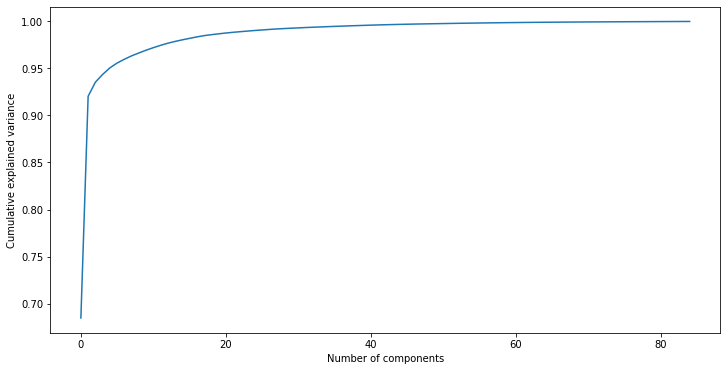

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 85)

principalComponents = pca.fit_transform(df.iloc[:, :-1].values)

ev=pca.explained_variance_ratio_

plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(ev))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')


plt.show()


Select 40 as the no.of components for PCA

In [12]:
pca = PCA(n_components = 40)
dt = pca.fit_transform(df.iloc[:, :-1].values)
q = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = y.ravel())], axis = 1)
q.columns = [f'PC-{i}' for i in range(1,41)]+['class']

In [13]:
q.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,PC-11,PC-12,PC-13,PC-14,PC-15,PC-16,PC-17,PC-18,PC-19,PC-20,PC-21,PC-22,PC-23,PC-24,PC-25,PC-26,PC-27,PC-28,PC-29,PC-30,PC-31,PC-32,PC-33,PC-34,PC-35,PC-36,PC-37,PC-38,PC-39,PC-40,class
0,5014.905985,1456.863260,72.697049,71.204927,-435.686993,-68.840352,134.809923,-304.372421,256.432741,-66.631266,-122.608791,-29.204739,-121.088319,174.847780,-148.583852,157.044602,-51.375950,409.152500,-223.348651,8.026050,39.662401,-118.508904,-119.167655,47.668549,109.989668,-74.730408,49.886193,-54.327894,-5.695831,-16.459820,25.471550,19.762568,-1.920736,19.084064,-19.567268,-29.381376,-25.307661,-0.165057,64.302176,9.164323,3
1,5601.383743,-2023.450087,350.134661,-528.465051,148.088289,-288.359060,202.956919,240.848086,-474.858124,93.493407,302.631337,-8.493447,-78.950971,31.233769,67.000063,-42.580634,-127.633488,-136.372534,168.202144,38.725850,35.958250,-13.670769,102.852706,41.369956,-123.778409,-43.673097,162.813105,-67.801804,-216.154253,426.923988,-68.225710,100.648174,-80.593205,-53.070833,27.417098,13.021158,22.526562,2.387180,14.001741,43.235416,3
2,5796.135442,-3090.394852,490.539929,-760.214346,259.933291,-131.611199,172.927287,205.911290,572.491756,-191.621910,404.008385,-58.675603,-22.359105,-78.584206,-46.953938,55.018542,-141.366309,-217.397494,105.462990,-22.112532,-5.824392,10.226400,150.991302,109.640921,-157.876436,-136.420348,118.512874,30.333191,104.265399,-9.372231,54.354309,35.020076,-37.131355,-15.574856,20.176889,37.130000,18.975559,21.201700,-38.601913,90.514378,3
3,5586.204575,-2369.376085,356.274719,-502.687155,146.554943,-306.679338,251.071040,234.966491,-314.023338,54.962396,328.634432,35.040612,-46.571333,20.720989,146.116300,6.823960,-24.165277,-120.268712,157.066970,20.104881,13.024216,20.423856,110.242267,83.253857,-112.663529,-20.365976,171.761289,-85.365090,-207.277158,379.746672,-83.778129,128.039603,-64.814072,34.927455,22.450115,67.603296,11.021655,51.333917,-2.037769,59.314989,3
4,5020.990792,339.603390,-23.007525,-92.556769,-368.495442,-438.266691,502.715358,-345.536572,-188.352684,-67.505677,-256.850077,61.320882,57.619061,30.986315,26.175717,-66.648360,134.019588,139.388949,36.585405,44.423880,38.676576,-41.148100,-28.060858,50.047341,9.777838,-30.546079,92.374369,-51.398692,35.619101,38.249196,14.052875,-83.847331,73.147612,185.374605,-4.441118,-13.667887,12.569923,0.816683,60.180896,12.563313,3


### Display the bands after PCA

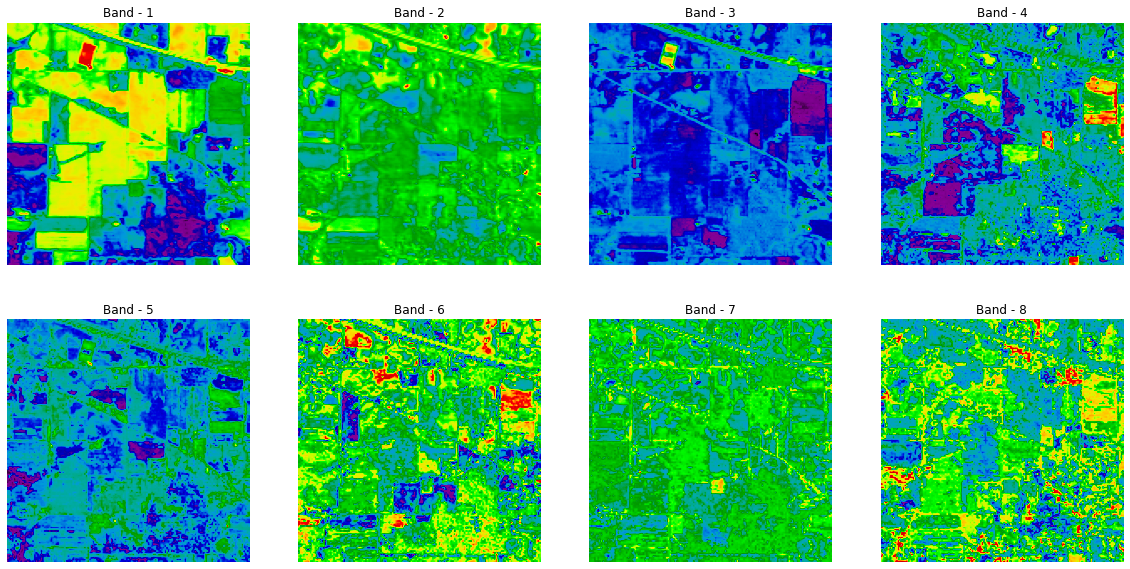

In [14]:
fig = plt.figure(figsize = (20, 10))

for i in range(1, 1+8):
    fig.add_subplot(2,4, i)
    plt.imshow(q.loc[:, f'PC-{i}'].values.reshape(145, 145), cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {i}')

plt.savefig('IP_PCA_Bands.png')

In [15]:
# saving to .csv
q.to_csv('IP_40_PCA.csv', index=False)

## Support Vector Machine(SVM)


In [99]:
x = q[q['class'] != 0]

X = x.iloc[:, :-1].values

y = x.loc[:, 'class'].values 

names = ['Alfalfa',	'Corn-notill', 'Corn-mintill',	'Corn',		'Grass-pasture','Grass-trees',
'Grass-pasture-mowed','Hay-windrowed','Oats','Soybean-notill','Soybean-mintill',
'Soybean-clean', 'Wheat',	'Woods',	'Buildings Grass Trees Drives',	'Stone Steel Towers']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11, stratify=y)

svm =  SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)

svm.fit(X_train, y_train)

ypred = svm.predict(X_test)

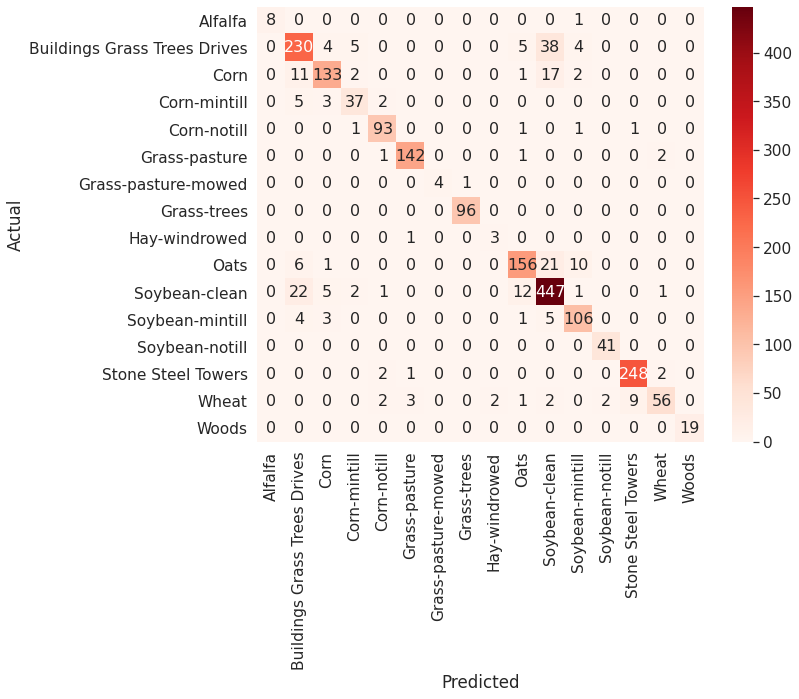

In [109]:
data = confusion_matrix(y_test, ypred)
df_cm = pd.DataFrame(data, columns=np.unique(names), index = np.unique(names))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": 16}, fmt='d')
plt.savefig('cmap.png', dpi=300)

In [98]:
print(classification_report(y_test, ypred, target_names = names))

                              precision    recall  f1-score   support

                     Alfalfa       1.00      0.89      0.94         9
                 Corn-notill       0.83      0.80      0.82       286
                Corn-mintill       0.89      0.80      0.84       166
                        Corn       0.79      0.79      0.79        47
               Grass-pasture       0.92      0.96      0.94        97
                 Grass-trees       0.97      0.97      0.97       146
         Grass-pasture-mowed       1.00      0.80      0.89         5
               Hay-windrowed       0.99      1.00      0.99        96
                        Oats       0.60      0.75      0.67         4
              Soybean-notill       0.88      0.80      0.84       194
             Soybean-mintill       0.84      0.91      0.88       491
               Soybean-clean       0.85      0.89      0.87       119
                       Wheat       0.95      1.00      0.98        41
                   

## Classification Map

In [127]:
l=[]
for i in range(q.shape[0]):
  if q.iloc[i, -1] == 0:
    l.append(0)
  else:
    l.append(svm.predict(q.iloc[i, :-1].values.reshape(1, -1)))


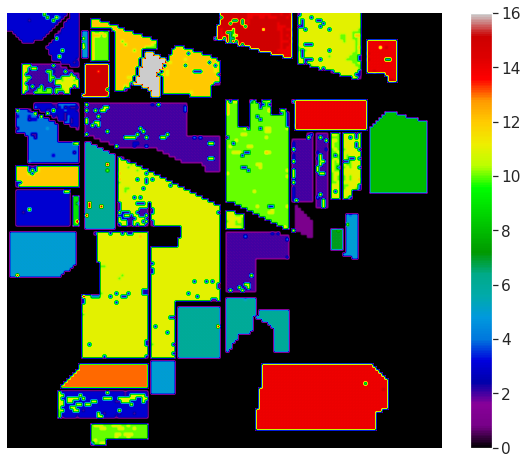

In [129]:
clmap = np.array(l).reshape(145, 145).astype('float')
plt.figure(figsize=(10, 8))
plt.imshow(clmap, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('IP_cmap.png')
plt.show()



---



---

